In [154]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [90]:
initial_data = {
    "Date": ["2024-11-20", "2024-11-21", "2024-11-22"],
    "Work": [3, 0, 0],
    "School/Study": [7, 9, 7],
    "Leisure/Break": [4, 3, 4],
    "Chore": [3, 5, 4],
    "Sleep": [5, 7, 9],
    "Rating": ["Bad", "Normal", "Good"]  # Labels for days
}

In [92]:
file_name = "daily_activity.csv"

# Check if the file exists
if not os.path.exists(file_name):
    # Create a DataFrame from the data
    df = pd.DataFrame(initial_data)
    
    # Save it to a CSV file
    df.to_csv(file_name, index=False)
    print(f"{file_name} created successfully!")
else:
    print(f"{file_name} already exists.")

daily_activity.csv created successfully!


In [94]:
df = pd.read_csv('daily_activity.csv')
print(df)

         Date  Work  School/Study  Leisure/Break  Chore  Sleep  Rating
0  2024-11-20     3             7              4      3      5     Bad
1  2024-11-21     0             9              3      5      7  Normal
2  2024-11-22     0             7              4      4      9    Good


In [97]:
import pandas as pd
import numpy as np

# Load existing daily activity data
df_existing = pd.read_csv('daily_activity.csv')

# Generate new random data
num_new_days = 100  # Number of new days
new_data = {
    "Date": pd.date_range(start="2024-11-19", periods=num_new_days, freq='-1D').strftime("%Y-%m-%d").tolist(),
    "Work": np.random.randint(0, 11, num_new_days),  # 0-10 hours
    "School/Study": np.random.randint(0, 11, num_new_days),  # 0-10 hours
    "Leisure/Break": np.random.randint(0, 6, num_new_days),  # 0-5 hours
    "Chore": np.random.randint(0, 5, num_new_days),  # 0-4 hours
    "Sleep": np.random.randint(4, 11, num_new_days),  # 4-10 hours
    "Rating": [np.nan] * num_new_days  # Add an empty 'Rating' column (NaN)
}

# Convert to DataFrame
df_new = pd.DataFrame(new_data)

# Append new data to existing data
df_combined = pd.concat([df_existing, df_new], ignore_index=True)

# Save to CSV
df_combined.to_csv("daily_activity.csv", index=False)

print("Data appended successfully.")
print(df_combined)


Data appended successfully.
           Date  Work  School/Study  Leisure/Break  Chore  Sleep  Rating
0    2024-11-20     3             7              4      3      5     Bad
1    2024-11-21     0             9              3      5      7  Normal
2    2024-11-22     0             7              4      4      9    Good
3    2024-11-19     7             2              3      3      4     NaN
4    2024-11-18     3             2              2      4      8     NaN
..          ...   ...           ...            ...    ...    ...     ...
98   2024-08-16     6            10              5      4      6     NaN
99   2024-08-15     2             2              0      1      5     NaN
100  2024-08-14     2            10              3      3      9     NaN
101  2024-08-13     9             9              5      2      7     NaN
102  2024-08-12     6             1              1      1     10     NaN

[103 rows x 7 columns]


In [104]:
df = pd.read_csv('daily_activity.csv')
print(df)

           Date  Work  School/Study  Leisure/Break  Chore  Sleep  Rating
0    2024-11-20     3             7              4      3      5     Bad
1    2024-11-21     0             9              3      5      7  Normal
2    2024-11-22     0             7              4      4      9    Good
3    2024-11-19     7             2              3      3      4     NaN
4    2024-11-18     3             2              2      4      8     NaN
..          ...   ...           ...            ...    ...    ...     ...
98   2024-08-16     6            10              5      4      6     NaN
99   2024-08-15     2             2              0      1      5     NaN
100  2024-08-14     2            10              3      3      9     NaN
101  2024-08-13     9             9              5      2      7     NaN
102  2024-08-12     6             1              1      1     10     NaN

[103 rows x 7 columns]


In [106]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Load labeled data
df = pd.read_csv("daily_activity.csv")
df = df.dropna()

# Features and target
X = df[["Work", "School/Study", "Leisure/Break", "Chore", "Sleep"]]  # Features
y = df["Rating"]  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Save the model (optional)
import joblib
joblib.dump(model, "day_rating_model.pkl")

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00       1.0
        Good       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\darel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\darel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\darel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\darel\anaconda3\Lib\site-packages\sklea

['day_rating_model.pkl']

In [134]:
df = pd.read_csv('sleep_health.csv')
print(df)

     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                

In [172]:
df1 = df.drop(columns=['Blood Pressure', 'Heart Rate', 'Sleep Disorder', 'Occupation', 'Stress Level', 'Person ID', 'Physical Activity Level'])
df1.to_csv("sleep_data.csv", index=False)

In [176]:
df1 = pd.read_csv('sleep_data.csv')
df1

,Gender,Age,Sleep Duration,Quality of Sleep,BMI Category,Daily Steps
0,Male,27,6.1,6,Overweight,4200
1,Male,28,6.2,6,Normal,10000
2,Male,28,6.2,6,Normal,10000
3,Male,28,5.9,4,Obese,3000
4,Male,28,5.9,4,Obese,3000
...,...,...,...,...,...,...
369,Female,59,8.1,9,Overweight,7000
370,Female,59,8.0,9,Overweight,7000
371,Female,59,8.1,9,Overweight,7000
372,Female,59,8.1,9,Overweight,7000


In [232]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns
df1['Gender'] = LabelEncoder().fit_transform(df1['Gender'])
df1['BMI Category'] = LabelEncoder().fit_transform(df1['BMI Category'])

# Scale numerical columns
numerical_columns = ['Age', 'Sleep Duration', 'Daily Steps']
scaler = StandardScaler()
df1[numerical_columns] = scaler.fit_transform(df1[numerical_columns])

#Dump the fitted scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [194]:
from sklearn.model_selection import train_test_split

X = df1.drop(columns=['Quality of Sleep'])  # Features
y = df1['Quality of Sleep']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Test the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.02068


In [230]:
import joblib
joblib.dump(model, 'sleep_quality_model.pkl')

['sleep_quality_model.pkl']

Mean Squared Error: 0.02068
Mean Absolute Error: 0.046666666666666655
R² Score: 0.9862921282111713


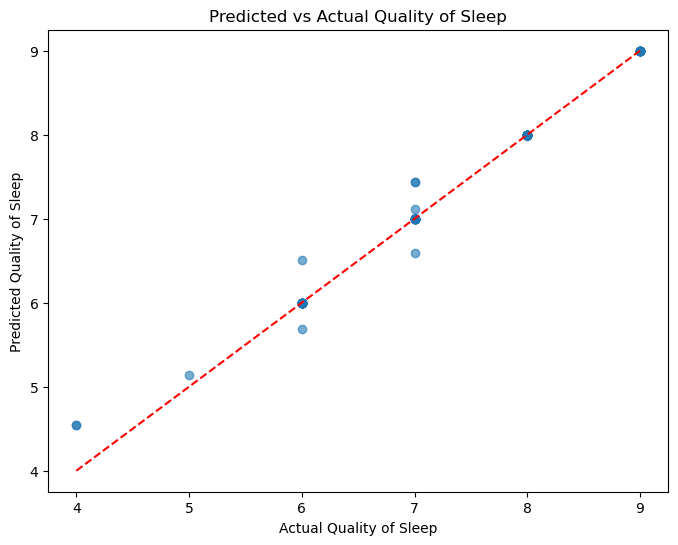

In [220]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate additional metrics
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.title('Predicted vs Actual Quality of Sleep')
plt.xlabel('Actual Quality of Sleep')
plt.ylabel('Predicted Quality of Sleep')
plt.show()

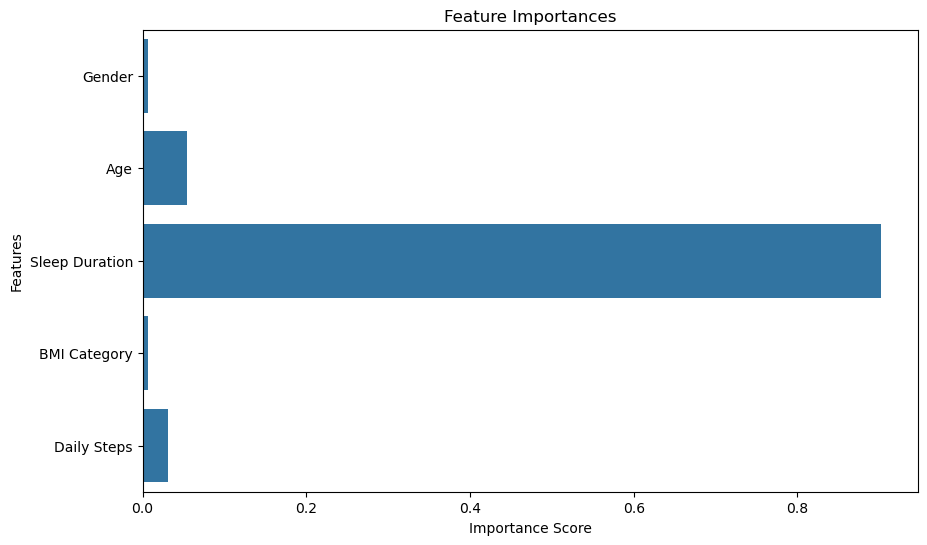

In [228]:
# Get feature importances
import seaborn as sns
importances = model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

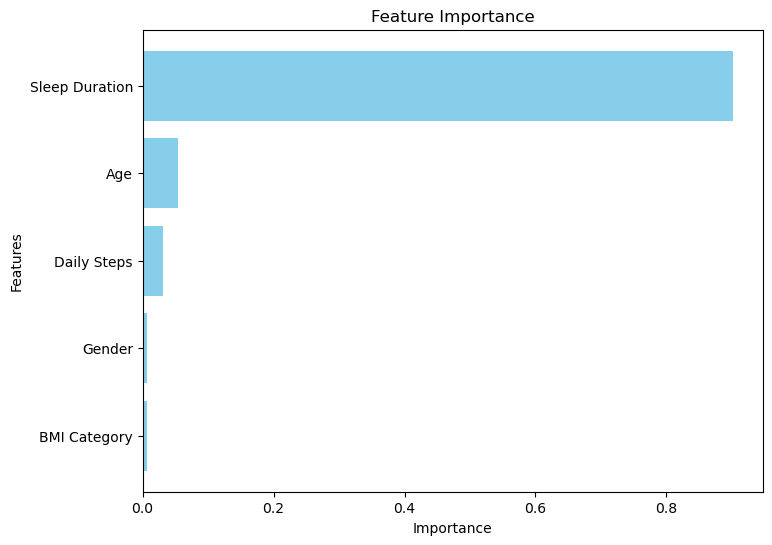

In [206]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'model' is your trained Random Forest model
feature_importances = model.feature_importances_
features = X.columns  # Feature names

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Flip for better readability
plt.show()


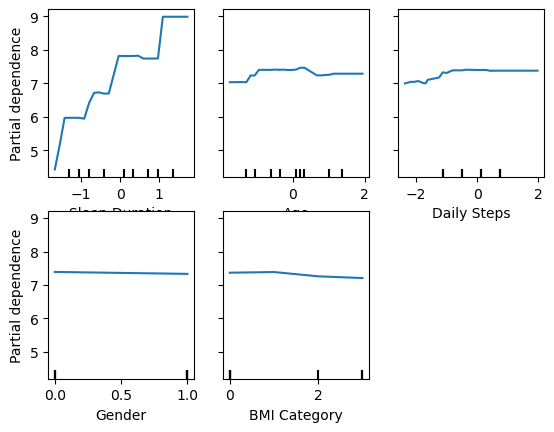

In [212]:
from sklearn.inspection import PartialDependenceDisplay

# Visualize the effect of 'Sleep Duration' and 'Physical Activity Level'
PartialDependenceDisplay.from_estimator(model, X, ['Sleep Duration', 'Age', 'Daily Steps', 'Gender', 'BMI Category'])
plt.show()

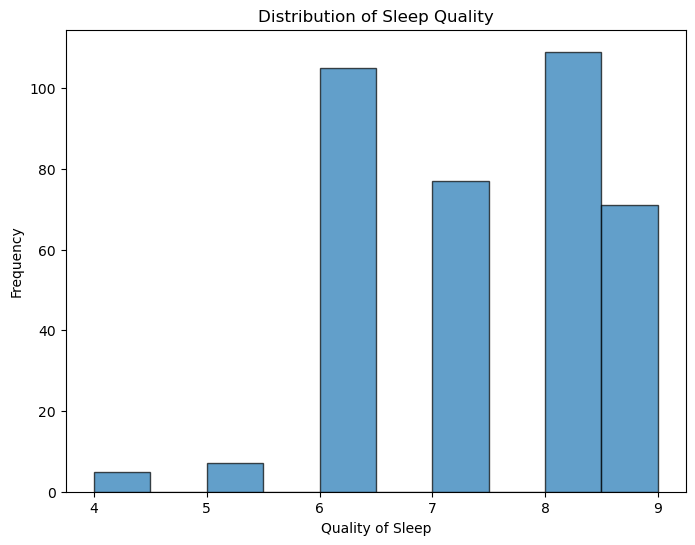

In [214]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(df1['Quality of Sleep'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Sleep Quality')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.show()

In [234]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
df1 = pd.read_csv('sleep_data.csv')

# Encode categorical columns
df1['Gender'] = LabelEncoder().fit_transform(df1['Gender'])
df1['BMI Category'] = LabelEncoder().fit_transform(df1['BMI Category'])

# Scale numerical columns
numerical_columns = ['Age', 'Sleep Duration', 'Daily Steps']
scaler = StandardScaler()
df1[numerical_columns] = scaler.fit_transform(df1[numerical_columns])

#Dump the fitted scaler
#joblib.dump(scaler, 'scaler.pkl')

X = df1.drop(columns=['Quality of Sleep'])  # Features
y = df1['Quality of Sleep']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Test the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

#joblib.dump(model, 'sleep_quality_model.pkl')

Mean Squared Error: 0.02068


In [240]:
input_data = np.array([[0, 30, 8, 1, 7000]])
input_cleaned = scaler.transform(input_data)
predi = model.predict(input_cleaned)
predi


C:\Users\darel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 5 features, but StandardScaler is expecting 3 features as input.

In [258]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
df1 = pd.read_csv('sleep_data.csv')

# Encode categorical columns
df1['Gender'] = LabelEncoder().fit_transform(df1['Gender'])
df1['BMI Category'] = LabelEncoder().fit_transform(df1['BMI Category'])

# Scale numerical columns
numerical_columns = ['Age', 'Sleep Duration', 'Daily Steps']
scaler = StandardScaler()
df1[numerical_columns] = scaler.fit_transform(df1[numerical_columns])

# Save the fitted scaler
joblib.dump(scaler, 'scaler.pkl')

# Prepare features and target
X = df1.drop(columns=['Quality of Sleep'])  # Features
y = df1['Quality of Sleep']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Test the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Save the trained model
joblib.dump(model, 'sleep_quality_model.pkl')

# Function to preprocess input for prediction
def preprocess_input(gender, age, sleep_duration, bmi_category, daily_steps):
    # Encode categorical features
    gender_encoded = 0 if gender == "Male" else 1
    bmi_encoded = LabelEncoder().fit(['Underweight', 'Normal', 'Overweight', 'Obese']).transform([bmi_category])[0]
    
    # Prepare the input data with numerical features only for scaling
    numerical_input = np.array([[age, sleep_duration, daily_steps]])
    
    # Scale the numerical input data using the fitted scaler
    input_scaled = scaler.transform(numerical_input)
    
    # Combine scaled numerical input with encoded categorical features
    input_final = np.concatenate([[gender_encoded, bmi_encoded], input_scaled[0]])
    
    return input_final.reshape(1, -1)  # Reshape for the model

# Example of manual prediction
gender = "Female"
age = 40
sleep_duration = 10
bmi_category = "Normal"
daily_steps = 10000

input_cleaned = preprocess_input(gender, age, sleep_duration, bmi_category, daily_steps)
predicted_quality = model.predict(input_cleaned)

print(f"Predicted Quality of Sleep: {predicted_quality[0]:.2f}")


Mean Squared Error: 0.02068
Predicted Quality of Sleep: 6.27


C:\Users\darel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\darel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [260]:
df1

,Gender,Age,Sleep Duration,Quality of Sleep,BMI Category,Daily Steps
0,1,-1.753096,-1.298887,6,3,-1.619584
1,1,-1.637643,-1.173036,6,0,1.970077
2,1,-1.637643,-1.173036,6,0,1.970077
3,1,-1.637643,-1.550588,4,2,-2.362273
4,1,-1.637643,-1.550588,4,2,-2.362273
...,...,...,...,...,...,...
369,0,1.941401,1.218127,9,3,0.113356
370,0,1.941401,1.092276,9,3,0.113356
371,0,1.941401,1.218127,9,3,0.113356
372,0,1.941401,1.218127,9,3,0.113356


In [5]:
df1 = pd.read_csv('sleep_data.csv')
df1

,Gender,Age,Sleep Duration,Quality of Sleep,BMI Category,Daily Steps
0,Male,27,6.1,6,Overweight,4200
1,Male,28,6.2,6,Normal,10000
2,Male,28,6.2,6,Normal,10000
3,Male,28,5.9,4,Obese,3000
4,Male,28,5.9,4,Obese,3000
...,...,...,...,...,...,...
369,Female,59,8.1,9,Overweight,7000
370,Female,59,8.0,9,Overweight,7000
371,Female,59,8.1,9,Overweight,7000
372,Female,59,8.1,9,Overweight,7000


In [7]:
df1.describe()

,Age,Sleep Duration,Quality of Sleep,Daily Steps
count,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,6816.844920
std,8.673133,0.795657,1.196956,1617.915679
min,27.000000,5.800000,4.000000,3000.000000
25%,35.250000,6.400000,6.000000,5600.000000
50%,43.000000,7.200000,7.000000,7000.000000
75%,50.000000,7.800000,8.000000,8000.000000
max,59.000000,8.500000,9.000000,10000.000000


In [9]:
df2 = df1.drop(columns=['BMI Category', 'Gender'])

In [11]:
df2

,Age,Sleep Duration,Quality of Sleep,Daily Steps
0,27,6.1,6,4200
1,28,6.2,6,10000
2,28,6.2,6,10000
3,28,5.9,4,3000
4,28,5.9,4,3000
...,...,...,...,...
369,59,8.1,9,7000
370,59,8.0,9,7000
371,59,8.1,9,7000
372,59,8.1,9,7000


In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df2.drop(columns=['Quality of Sleep'])
y = df2['Quality of Sleep']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predi = model.predict(X_test)

score = accuracy_score(y_test, predi)
score

0.9866666666666667

In [420]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df2.drop(columns=['Quality of Sleep'])
y = df2['Quality of Sleep']

model = DecisionTreeClassifier()
model.fit(X, y)

joblib.dump(model, 'sleep_quality_model.pkl')

['sleep_quality_model.pkl']

In [436]:
model = joblib.load('sleep_quality_model.pkl')
predi = model.predict([[25, 6.5, 2500]])
predi

C:\Users\darel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=int64)

In [446]:
predi

array([5], dtype=int64)

In [452]:
predi[0]

5

In [472]:
import sklearn
print(sklearn.__version__)

1.4.2
